Shape: (284807, 31)
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

--- Logistic Regression (Random Undersampling) ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
 [[83379  1916]
 [   17   131]]
F1 Score: 0.1194, AUPRC: 0.6513


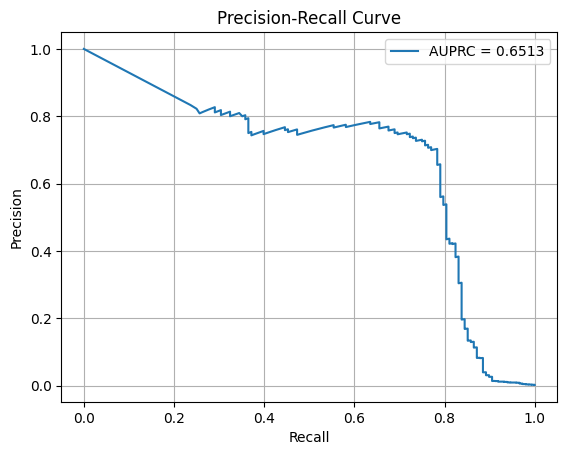


--- Random Forest (SMOTE Oversampling) ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85277    18]
 [   31   117]]
F1 Score: 0.8269, AUPRC: 0.8289


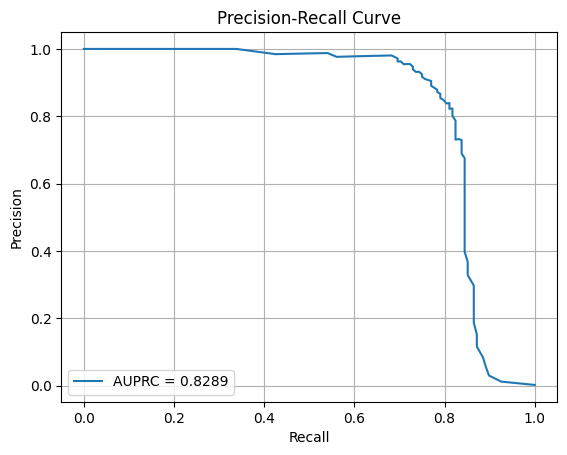

c:\GitHub\Credit Card Fraud Detection\fraud-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\GitHub\Credit Card Fraud Detection\fraud-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\GitHub\Credit Card Fraud Detection\fraud-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\GitHub\Credit Card Fraud Detection\fraud-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:25] WARNING: C:\actions-runner\_work\xgboost\


--- XGBoost (SMOTE + GridSearchCV) ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.24      0.84      0.37       148

    accuracy                           1.00     85443
   macro avg       0.62      0.92      0.69     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[84903   392]
 [   24   124]]
F1 Score: 0.3735, AUPRC: 0.8035


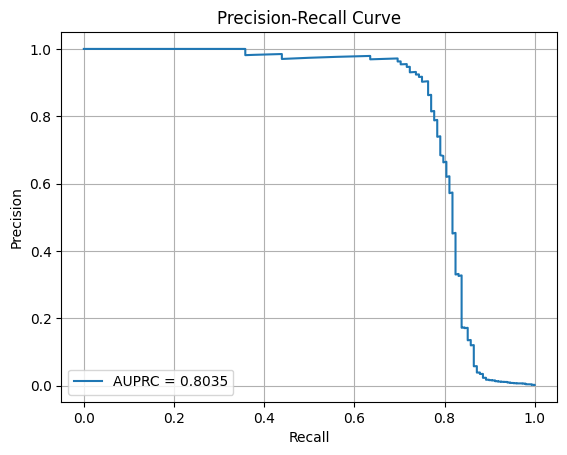

[LightGBM] [Info] Number of positive: 132680, number of negative: 132680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 265360, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 132680, number of negative: 132680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 265360, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 132680, number of negative: 132680
[LightGBM] [Info] Auto-choosing col-wise mu

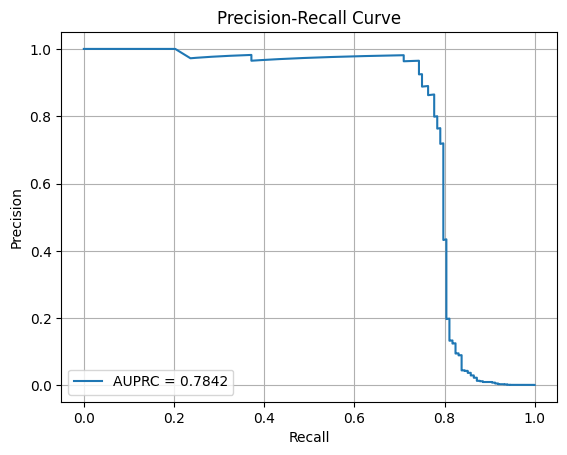


Model Comparison:
                                 Model  F1 Score     AUPRC
0  Logistic Regression (Undersampling)  0.119362  0.651290
1                Random Forest (SMOTE)  0.826855  0.828907
2       XGBoost (SMOTE + GridSearchCV)  0.373494  0.803477
3      LightGBM (SMOTE + GridSearchCV)  0.762215  0.784243


In [2]:
# Credit Card Fraud Detection - Modeling with Resampling and AUPRC Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_recall_curve, auc, f1_score, classification_report, 
                             confusion_matrix, average_precision_score)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load data
import os
from pathlib import Path

# Define a flexible path to the dataset
DATA_PATH = Path("Data") / "creditcard.csv"
assert DATA_PATH.exists(), f"Dataset not found at {DATA_PATH}"
df = pd.read_csv(DATA_PATH)

# Data overview
print(f"Shape: {df.shape}")
print(df['Class'].value_counts(normalize=True))

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Helper function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    prc_auc = average_precision_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"F1 Score: {f1:.4f}, AUPRC: {prc_auc:.4f}")

    # Precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f'AUPRC = {prc_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

# 1. Logistic Regression with Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
model_lr_rus = LogisticRegression(max_iter=1000)
model_lr_rus.fit(X_rus, y_rus)
print("\n--- Logistic Regression (Random Undersampling) ---")
evaluate_model(model_lr_rus, X_test, y_test)

# 2. Random Forest with SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
model_rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_smote.fit(X_smote, y_smote)
print("\n--- Random Forest (SMOTE Oversampling) ---")
evaluate_model(model_rf_smote, X_test, y_test)

# 3. XGBoost with SMOTE + Grid Search
grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
model_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                         grid_xgb, scoring='average_precision', cv=3, verbose=0)
model_xgb.fit(X_smote, y_smote)
print("\n--- XGBoost (SMOTE + GridSearchCV) ---")
evaluate_model(model_xgb.best_estimator_, X_test, y_test)

# 4. LightGBM with SMOTE + Grid Search
grid_lgbm = {
    'n_estimators': [50, 100],
    'num_leaves': [31, 64],
    'learning_rate': [0.05, 0.1]
}
model_lgbm = GridSearchCV(LGBMClassifier(), grid_lgbm, scoring='average_precision', cv=3, verbose=0)
model_lgbm.fit(X_smote, y_smote)
print("\n--- LightGBM (SMOTE + GridSearchCV) ---")
evaluate_model(model_lgbm.best_estimator_, X_test, y_test)

# Save AUPRCs for comparison
results = pd.DataFrame({
    'Model': [
        'Logistic Regression (Undersampling)', 
        'Random Forest (SMOTE)', 
        'XGBoost (SMOTE + GridSearchCV)', 
        'LightGBM (SMOTE + GridSearchCV)'
    ],
    'F1 Score': [
        f1_score(y_test, model_lr_rus.predict(X_test)),
        f1_score(y_test, model_rf_smote.predict(X_test)),
        f1_score(y_test, model_xgb.best_estimator_.predict(X_test)),
        f1_score(y_test, model_lgbm.best_estimator_.predict(X_test))
    ],
    'AUPRC': [
        average_precision_score(y_test, model_lr_rus.predict_proba(X_test)[:, 1]),
        average_precision_score(y_test, model_rf_smote.predict_proba(X_test)[:, 1]),
        average_precision_score(y_test, model_xgb.best_estimator_.predict_proba(X_test)[:, 1]),
        average_precision_score(y_test, model_lgbm.best_estimator_.predict_proba(X_test)[:, 1])
    ]
})

print("\nModel Comparison:")
print(results)

# Optional: Save results
# results.to_csv("model_performance_comparison.csv", index=False)

# End of notebook
